importing tha pandas library, so we can load the dataframe of the epilepsy patients

In [22]:
import pandas as pd

Uploading the dataframe and calling it 'df' . The df containt 20 column and 443 rows before cleaning.

In [23]:
df = pd.read_csv("C:/Users/97258/Downloads/Metadata_Release_Anon (1).csv")
df

,ID,Sex,Binned_Onset_Age,FUS,fqFUS,FBTCS,fqFBTCS,SE,Op_Side,Op_Type,Pathology,OP MEMO,Number_ASMs,Binned_Age_at_Scan,Binned_Age_at_Surgery,ILAE_Year1,ILAE_Year2,ILAE_Year3,ILAE_Year4,ILAE_Year5
0,1,M,1 to 2,True,2.0,True,3.00,False,R,T Lx,OTHER,oligodendroglial hyperplasia,3,20 to 24,20 to 24,4.0,4.0,4.0,4.0,NaN
1,2,F,15 to 19,True,42.0,True,0.33,False,R,T Lx,HS,type 1,1,35 to 39,35 to 39,1.0,1.0,1.0,1.0,NaN
2,3,M,15 to 19,True,1.5,True,0.00,False,L,T Lesx,DNT,NaN,2,25 to 29,25 to 29,1.0,1.0,1.0,1.0,1.0
3,4,M,11 to 14,True,10.0,False,NaN,False,R,T Lx,OTHER,EFG,2,40 to 44,45 to 49,4.0,4.0,2.0,2.0,2.0
4,5,F,5 to 7,True,4.0,True,0.00,False,L,T Lx,HS,type 1; (& FCD type IIIA),2,45 to 49,45 to 49,2.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,459,M,11 to 14,True,0.5,False,NaN,False,L,O P Lx,FCD,type IIID,4,15 to 20,20 to 24,3.0,NaN,NaN,NaN,NaN
439,460,M,Over 40,True,14.0,True,0.25,False,L,T Lx,HS,NaN,2,45 to 49,50 to 54,1.0,1.0,1.0,1.0,1.0
440,461,M,5 to 7,True,22.0,True,0.29,False,L,T Lx,HS,NaN,2,40 to 44,40 to 44,3.0,1.0,3.0,3.0,1.0
441,462,F,15 to 19,True,56.0,True,0.00,False,L,T Lesx,CAV,NaN,1,15 to 20,15 to 20,1.0,1.0,1.0,1.0,2.0


DATA CLEANING

-test Data cleaning:

--importing the tests:

In [24]:
from tests.test_data_cleaning import test_lobe_extraction
from tests.test_data_cleaning import test_clean_lobe_column
from tests.test_data_cleaning import test_remove_rows_with_too_many_nans
from tests.test_data_cleaning import test_refill_nan_with_previous
from tests.test_data_cleaning import test_filter_rows_by_conditions
from tests.test_data_cleaning import test_calculate_mean_age
print()

--running the tests

In [25]:
test_lobe_extraction()
print()
test_clean_lobe_column()
print()
test_remove_rows_with_too_many_nans()
print()
test_refill_nan_with_previous()
print()
test_filter_rows_by_conditions()
print()
test_calculate_mean_age()

test_lobe_extraction passed

test_clean_lobe_column passed!

test_remove_rows_with_too_many_nans passed!

test_refill_nan_with_previous passed!

test_filter_rows_by_conditions passed! 

test_calculate_mean_age passed!


-Operating The Cleaning:

--Importing all the cleaning functions from the src.data_cleaning 
lobe_extraction: The function extracts the lobe from the column 'Op_Type' , makes a new column called 'lobe' and inserts the extracted data 
clean_lobe_column: The function makes sure that the 'lobe' column has only one of these letters "TOPF" in each cell
remove_rows_with_too_many_nans: This function deletes rows that have over one year of missing data (NaN)
refill_nan_with_previous: The function fills the rows that are left with one year of missing data, copying the previous year
filter_rows_by_conditions: This function makes sure there are at least four of either 1 and 2 or 3 - 5, deleting the rows that are not following those rulles.
calculate_mean_age: This function calculate the mean age of the first seizure creating a new column called 'mean_age' and inserts the calculated data.

In [26]:
from src.data_cleaning import lobe_extraction 
from src.data_cleaning import clean_lobe_column
from src.data_cleaning import remove_rows_with_too_many_nans
from src.data_cleaning import refill_nan_with_previous
from src.data_cleaning import filter_rows_by_conditions
from src.data_cleaning import calculate_mean_age

--Operating the functions form the cleaning on the data frame.

In [27]:
df = lobe_extraction(df,"Op_Type") 
df = clean_lobe_column(df) 
df_all = remove_rows_with_too_many_nans(df, ["ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5"],1)
general_df = refill_nan_with_previous(df_all,["ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5"])
df, excluded_df = filter_rows_by_conditions(df,["ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5"],[((1, 2), 4), ((3, 5), 4)])
df = calculate_mean_age(df,"Binned_Onset_Age","mean_age")
df

,ID,Sex,Binned_Onset_Age,FUS,fqFUS,FBTCS,fqFBTCS,SE,Op_Side,Op_Type,...,Number_ASMs,Binned_Age_at_Scan,Binned_Age_at_Surgery,ILAE_Year1,ILAE_Year2,ILAE_Year3,ILAE_Year4,ILAE_Year5,lobe,mean_age
0,1,M,1 to 2,True,2.0,True,3.00,False,R,T Lx,...,3,20 to 24,20 to 24,4.0,4.0,4.0,4.0,NaN,T,1.5
1,2,F,15 to 19,True,42.0,True,0.33,False,R,T Lx,...,1,35 to 39,35 to 39,1.0,1.0,1.0,1.0,NaN,T,17.0
2,3,M,15 to 19,True,1.5,True,0.00,False,L,T Lesx,...,2,25 to 29,25 to 29,1.0,1.0,1.0,1.0,1.0,T,17.0
3,8,F,3 to 4,True,16.0,False,NaN,False,R,P Lesx,...,3,40 to 44,40 to 44,1.0,1.0,1.0,1.0,1.0,P,3.5
4,9,F,20 to 24,True,10.0,True,0.00,False,R,T Lx,...,2,25 to 29,25 to 29,1.0,1.0,3.0,1.0,1.0,T,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,451,F,8 to 10,True,10.0,True,0.00,False,R,T Lx,...,2,40 to 44,40 to 44,1.0,1.0,1.0,1.0,1.0,T,9.0
245,455,F,5 to 7,True,4.5,True,0.08,False,R,T Lx,...,2,40 to 44,40 to 44,1.0,1.0,4.0,1.0,2.0,T,6.0
246,460,M,Over 40,True,14.0,True,0.25,False,L,T Lx,...,2,45 to 49,50 to 54,1.0,1.0,1.0,1.0,1.0,T,40.0
247,462,F,15 to 19,True,56.0,True,0.00,False,L,T Lesx,...,1,15 to 20,15 to 20,1.0,1.0,1.0,1.0,2.0,T,17.0


Ensuring Data:

-importing the testing that is done on the cleaned data frame. 
The function will make sure that all the cells in the lobe column are letters (to be precise "TOPF"), all the cells in the ILAE_yearX column are numeric and 1-5 , and making sure of "mean_age" "lobe" and "Pathology" dont have NaN's

In [28]:
from tests.ensuring_data import get_unique_general

-Operating the function

In [29]:
list_of_columns = ("lobe","Pathology","mean_age","ILAE_Year1","ILAE_Year2","ILAE_Year3","ILAE_Year4","ILAE_Year5")
get_unique_general(df,list_of_columns)
print("Yay everything is unique!!!")


Unique values in column 'lobe':
{'O', 'T', 'F', 'P'}

Unique values in column 'Pathology':
{'HS', 'DNT', 'FCD', 'DUAL', 'CAV', 'OTHER', 'GL'}

Unique values in column 'mean_age':
{np.float64(32.0), np.float64(1.5), np.float64(1.0), np.float64(3.5), np.float64(37.0), np.float64(6.0), np.float64(40.0), np.float64(9.0), np.float64(12.5), np.float64(17.0), np.float64(22.0), np.float64(27.0)}

Unique values in column 'ILAE_Year1':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year2':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year3':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year4':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)}

Unique values in column 'ILAE_Year5':
{np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), n

DATA ANALYSIS:

-Testing The Data Analysis

--importing the tests

In [30]:
from tests.test_data_analysis import test_count_by_range
from tests.test_data_analysis import test_analyze_column_significant_only
from tests.test_data_analysis import test_check_commonality_with_comparison

--Running the tests:

In [31]:
test_count_by_range()
print()
test_analyze_column_significant_only()
print()
test_check_commonality_with_comparison()
print()

test_count_by_range Passed!

Found significant difference between good and bad counts for Test Column D.
Good Count: 12, Bad Count: 2
P-value: 0.0129394531
--------------------------------------------------
test_analyze_column_significant_only passed!

Original number of rows: 10
Filtered number of rows: 6
Common value found in 'Category': A
Before filtering: 5 occurrences
After filtering: 3 occurrences
--------------------------------------------------
Common value found in 'Category2': X
Before filtering: 4 occurrences
After filtering: 3 occurrences
--------------------------------------------------
Common values found across the DataFrame after filtering:
Category: A
Category2: X
test_check_commonality_with_comparison Passed!



-Operating The Data Analysis

--Importing the function that calls for all functions responsabile for analysis. 
The function contains:
count_one_or_two : This function counts all the rows that has at least 4 of the "good" data and ading it to the count of each unique "lobe"/"Pathology"/"mean_age"
count_three_to_five:  This function counts all the rows that has at least 4 of the "bad" data and ading it to the count of each unique "lobe"/"Pathology"/"mean_age"
analyze_column_significant_only: This function take the count of the "bad" and "good" data fore each type in each column and does a binomal test to see if there is a statisctic significance.

In [32]:
from src.data_analysis import general_analyze
from src.data_analysis import check_commonality_with_comparison


--Running the function:

In [33]:
general_analyze(df,["mean_age", "Pathology", "lobe"]) # Calling the function that will operate the analysis for each column
common = check_commonality_with_comparison(df, excluded_df, threshold=0.8)

Found significant difference between good and bad counts for mean_age 1.5.
Good Count: 14, Bad Count: 3
P-value: 0.0127258301
--------------------------------------------------
Found significant difference between good and bad counts for mean_age 3.5.
Good Count: 15, Bad Count: 3
P-value: 0.0075378418
--------------------------------------------------
Found significant difference between good and bad counts for mean_age 6.0.
Good Count: 26, Bad Count: 7
P-value: 0.0013187272
--------------------------------------------------
Found significant difference between good and bad counts for mean_age 22.0.
Good Count: 24, Bad Count: 6
P-value: 0.0014309064
--------------------------------------------------
Found significant difference between good and bad counts for Pathology CAV.
Good Count: 17, Bad Count: 5
P-value: 0.0169005394
--------------------------------------------------
Found significant difference between good and bad counts for Pathology DUAL.
Good Count: 12, Bad Count: 2
P-value

DATA VISUALIZATION:

-Importing the function that creates plotting for the relevant data, the distribuition of patients for each pathology, lobe type and mean age of first seizure.

In [34]:
from src.data_visualisation import plot_multiple_columns_with_good_and_bad
from src.data_visualisation import plot_lobe_distribution_per_pathology
from src.data_visualisation import plot_general_analyze_results_all


-Operating the functions:

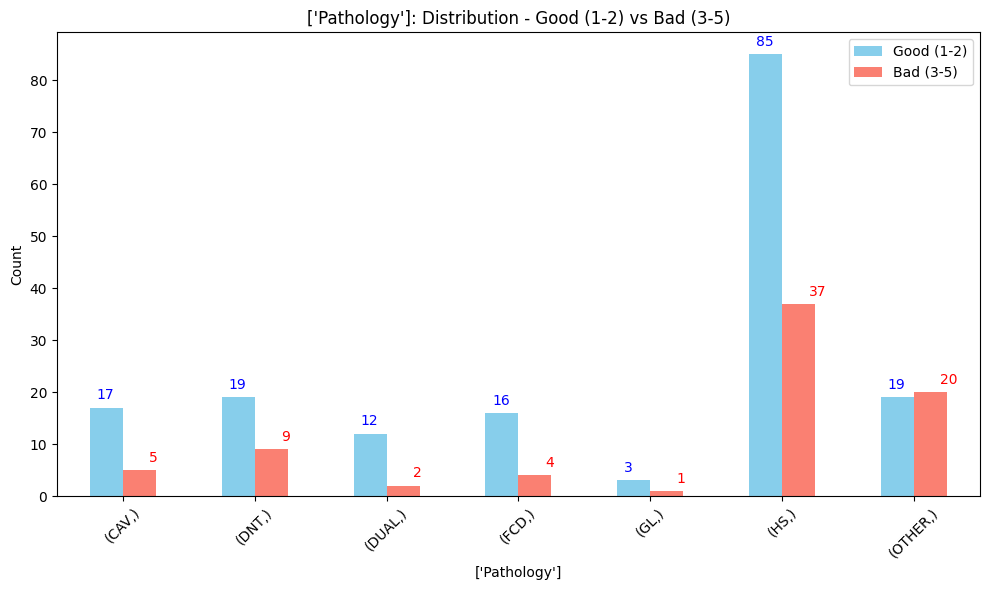

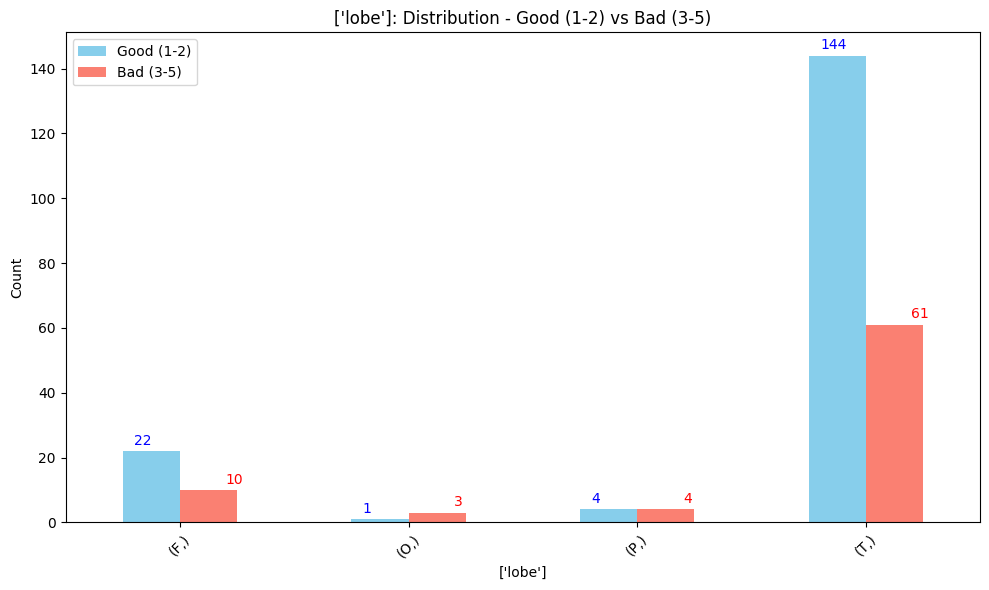

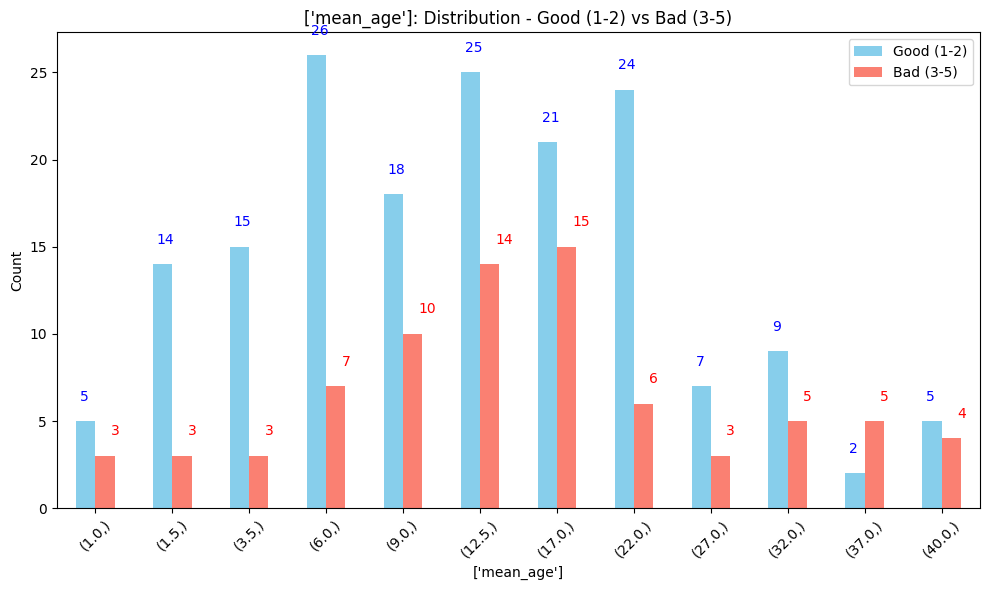

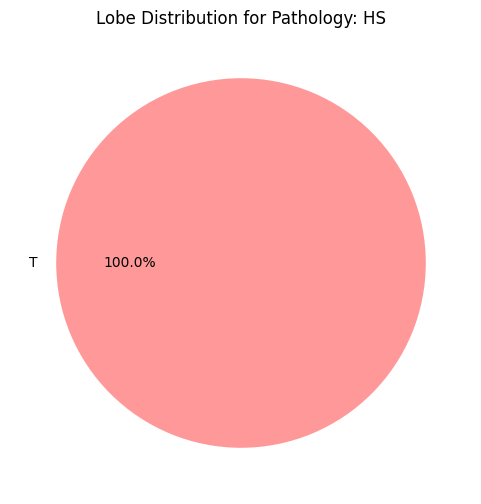

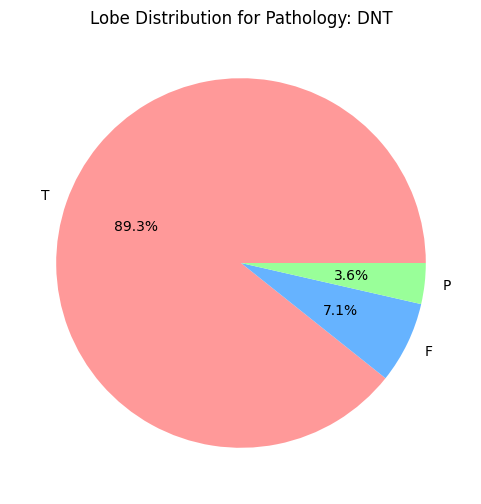

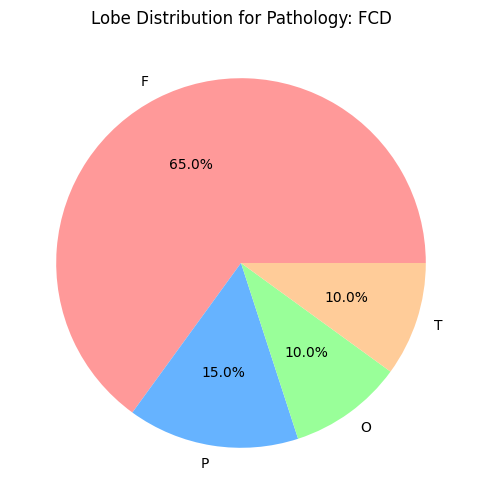

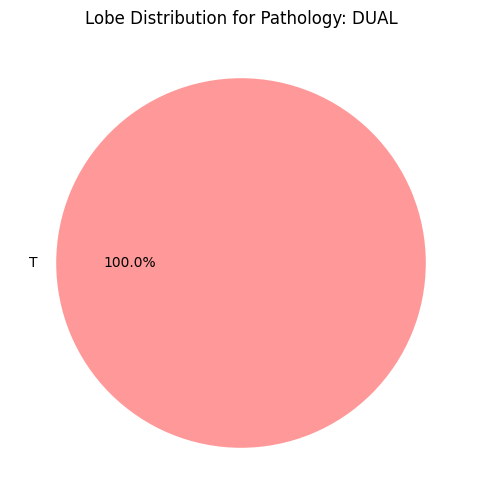

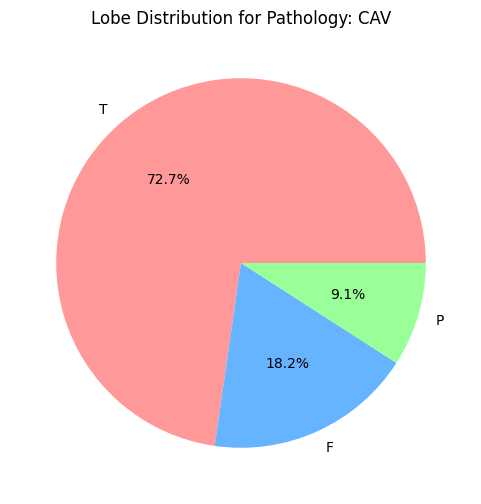

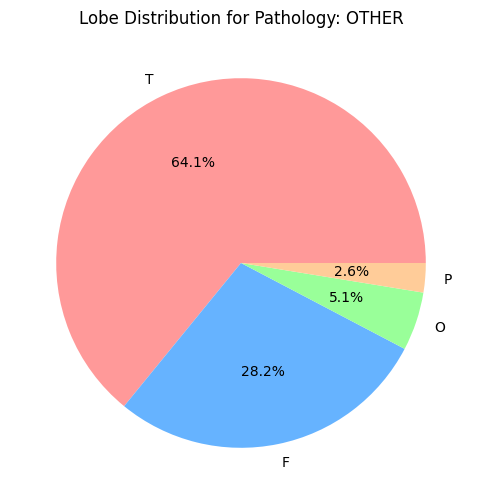

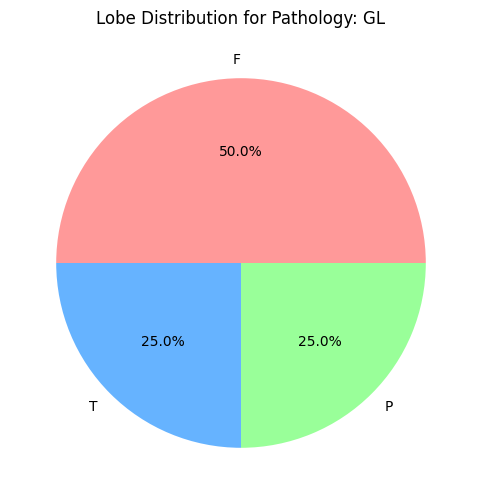

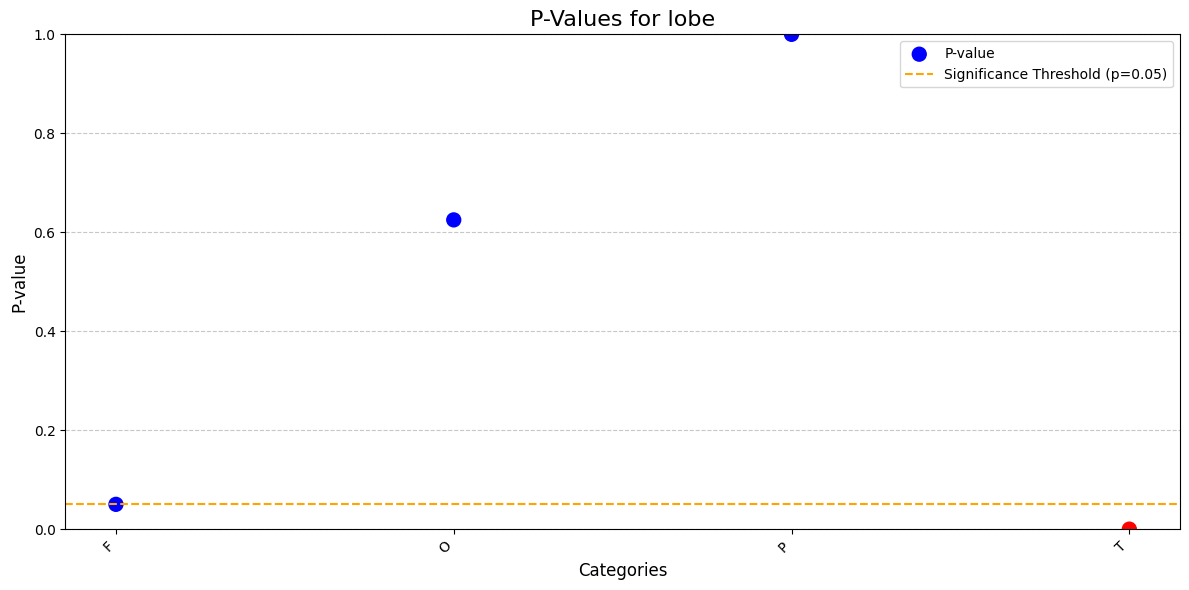

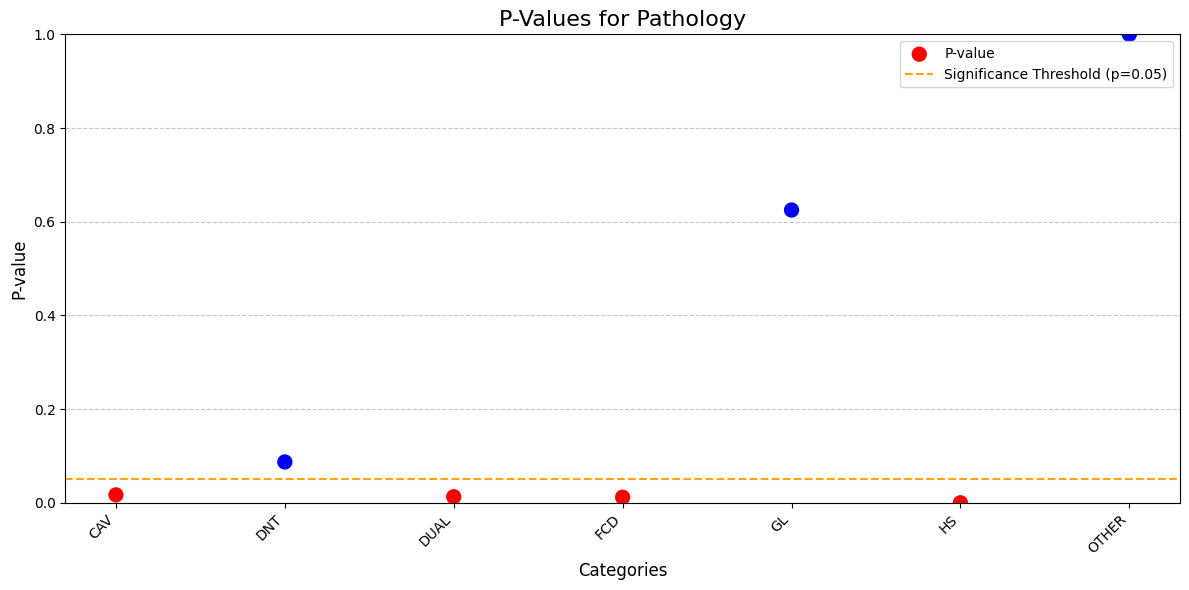

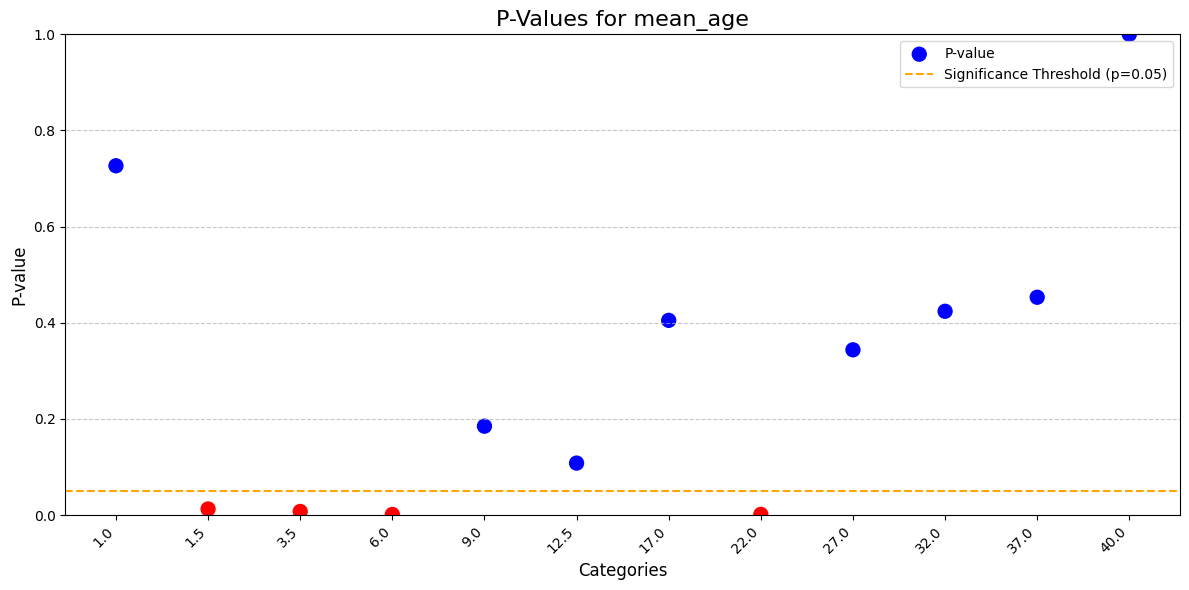

In [35]:
plot_multiple_columns_with_good_and_bad(df,[["Pathology"],["lobe"],["mean_age"]],)
plot_lobe_distribution_per_pathology(df, pathology_column="Pathology", lobe_column="lobe")
columns_to_analyze = ["lobe", "Pathology","mean_age"]
plot_general_analyze_results_all(df, columns_to_analyze)

